# SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = data.drop(['Timestamp', 'Open', 'High', 'Low', 'Volume_(BTC)','Volume_(Currency)','Weighted_Price'], axis=1)
data = data.dropna()
data.head()

,Close
0,4.39
478,4.39
547,4.57
548,4.58
1224,4.58


In [18]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel = 'rbf', gamma = 0.00001)

In [19]:
def determine_x_and_y(days_to_predict, data):
    
    data['Predictions'] = data[['Close']].shift(-days_to_predict)

    last_instance = len(data) - days_to_predict

    X = data.drop(['Predictions'], 1)
    X = np.array(X)
    X = X[: last_instance]
    X = X[-50000:]

    y = data['Predictions']
    y = np.array(y)
    y = y[: last_instance]
    y = y[-50000:]
    
    return X, y

In [20]:
def get_scores(list_of_days_to_predict, data):
    scores = []
    for days in list_of_days_to_predict:
        X, y = determine_x_and_y(days, data)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101) # TODO stratify = y
        svr_rbf.fit(X_train, y_train)
        svr_rbf_score = svr_rbf.score(X_test, y_test)
        scores.append(svr_rbf_score)
    return scores

In [21]:
list_of_days_to_predict = [1, 10, 20, 30, 90, 365]
all_scores = get_scores(list_of_days_to_predict, data)
all_scores

[0.35316775193456484,
 0.3572938211552349,
 0.35981040510377005,
 0.36114608876431364,
 0.36263926289510584,
 0.35685641811648394]

In [4]:
# data.tail(31)

In [68]:
svr_rbf_predictions = svr_rbf.predict(X_test)

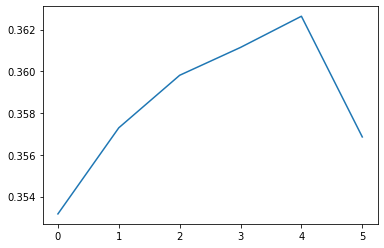

In [23]:

plt.plot(all_scores)
plt.show()